In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def train_and_evaluate_nn(X_train, y_train, X_test, y_test, alpha=0.1, epochs=10000):
    np.random.seed(0)  # for reproducibility
    
    # Initialize weights and biases
    W1 = np.random.rand(2, 2)
    b1 = np.random.rand(1, 2)
    W2 = np.random.rand(2, 1)
    b2 = np.random.rand(1, 1)

    m_train = X_train.shape[0]  # number of training examples
    
    # Training the network
    for epoch in range(epochs):
        # Forward propagation
        Z1 = np.dot(X_train, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)
        
        # Backward propagation
        dZ2 = A2 - y_train
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        
        dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
        dW1 = np.dot(X_train.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        
        # Update the weights and biases
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
    
    # Testing the network
    Z1_test = np.dot(X_test, W1) + b1
    A1_test = sigmoid(Z1_test)
    Z2_test = np.dot(A1_test, W2) + b2
    A2_test = sigmoid(Z2_test)
    predictions = np.round(A2_test)  # Rounding to get binary outputs
    
    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Display the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return W1, b1, W2, b2


In [2]:
# Setting a random seed for reproducibility
np.random.seed(0)

# Generating synthetic data
def generate_data(num_samples):
    X = np.random.randint(0, 2, (num_samples, 2))
    y = np.logical_xor(X[:, 0], X[:, 1]).astype(int).reshape(-1, 1)
    return X, y

# Generating training and testing data
X_train, y_train = generate_data(1000)  # 1000 samples for training
X_test, y_test = generate_data(300)  # 300 samples for testing

(X_train[:5], y_train[:5]), (X_test[:5], y_test[:5])  # Displaying the first 5 samples from each dataset

((array([[0, 1],
         [1, 0],
         [1, 1],
         [1, 1],
         [1, 1]]),
  array([[1],
         [1],
         [0],
         [0],
         [0]])),
 (array([[1, 1],
         [0, 0],
         [0, 1],
         [0, 0],
         [0, 1]]),
  array([[0],
         [0],
         [1],
         [0],
         [1]])))

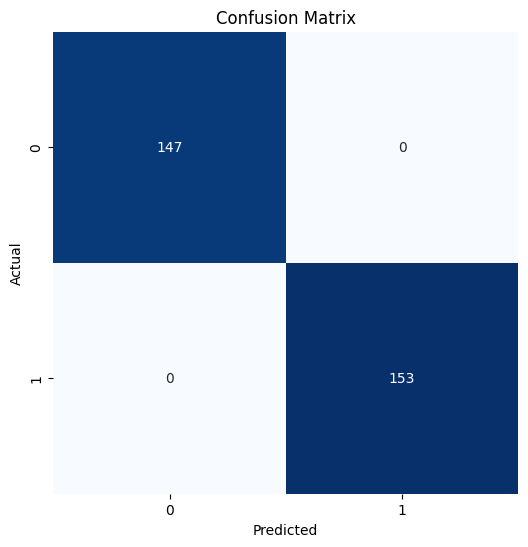

In [5]:
W1, b1, W2, b2 = train_and_evaluate_nn(X_train, y_train, X_test, y_test, alpha=0.01, epochs=10000)

In [10]:
import sys
sys.path.append('../')
from tikzeng import *

# defined your arch
arch = [
    to_head( '..' ),
    to_cor(),
    to_begin(),
    to_Conv("conv1", 512, 64, offset="(0,0,0)", to="(0,0,0)", height=64, depth=64, width=2 ),
    to_Pool("pool1", offset="(0,0,0)", to="(conv1-east)"),
    to_Conv("conv2", 128, 64, offset="(1,0,0)", to="(pool1-east)", height=32, depth=32, width=2 ),
    to_connection( "pool1", "conv2"), 
    to_Pool("pool2", offset="(0,0,0)", to="(conv2-east)", height=28, depth=28, width=1),
    to_SoftMax("soft1", 10 ,"(3,0,0)", "(pool1-east)", caption="SOFT"  ),
    to_connection("pool2", "soft1"),    
    to_Sum("sum1", offset="(1.5,0,0)", to="(soft1-east)", radius=2.5, opacity=0.6),
    to_connection("soft1", "sum1"),
    to_end()
    ]

def main():
    namefile = str(sys.argv[0]).split('.')[0]
    to_generate(arch, namefile + '.tex' )

if __name__ == '__main__':
    main()

PermissionError: [Errno 13] Permission denied: '/Library/Frameworks/Python.tex'